<img src="upGrad.png" alt="upGrad" align="Right" style="width: 200px;"/>
<img src="IIITB.jpeg" alt="IITB" align="Left" style="width: 200px;"/>

# Clustering and PCA assignment
<i> Author: Anish Mahapatra </i>

<i>Machine Learning I > Module 6</i>

### Problem Statement:
    
The CEO of the HELP, the NGO needs to decide how to use $10 million effectively. We have to choose the countries that are in the direst need of aid.  Categorise the countries using some socio-economic and health factors that determine the overall development of the country. 

Suggest the countries which the CEO needs to focus on the most.

### Suggested Approach:

- Perform PCA, choose the appropriate number of components 'k'

- Clustering is to be done on the k chosen components

- Outlier Analysis

- K-means to be done

- Single Linkage Hierchial Clustering

- Complete Linkage Hierarchial Clustering (May not produce identical results)

For cluster analysis, use the columns: gdpp, child_mort and income to recognize and differentiate the clusters of developed countries from the cluster of under-developed countries.

- Perform visualisations on the clusters that have been formed.  Choose first two Principal Components (on the X-Y axes) and plot a scatter plot of all the countries and differentiating the clusters

- You should also do the same visualisation using any two of the original variables (like gdpp, child_mort, etc.) on the X-Y axes as well. You can also choose other types of plots like boxplots, etc. 

- Reportat least 5 countries which are in direst need of aid


In [1]:
# Importing required packages

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

%matplotlib inline


In [2]:
# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ignoring warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing the dataset as a pandas dataframe
countryData = pd.read_csv('Country-data.csv')

#### Sense Check of the Country Data

In [4]:
# Viewing the data
countryData.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [5]:
# Viewing the shape of the data
countryData.shape

(167, 10)

There are 167 rows and 10 columns

In [6]:
# Viewing the data types of the columns
countryData.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

So, here we notice that that there is one column that is of a type 'string'

In [7]:
# Information regarding the dataset
countryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


The dataset looks good so far. Let's go ahead, make a copy of the data set and perform missing value analysis and outlier analysis on the dataset.

In [8]:
df = countryData.copy(deep = False)

### Missing Value Analysis

In [9]:
# Calculating the percent of missing values in the dataframe
percentMissing = (df.isnull().sum() / len(df)) * 100

# Making a dataframe with the missing values % and columns into a dataframe (on account of large number of rows) 
missingValuesDf = pd.DataFrame({'Column Name': df.columns,
                                 'Percent of data missing': percentMissing})

In [10]:
missingValuesDf

Column Name  Percent of data missing
country        country                      0.0
child_mort  child_mort                      0.0
exports        exports                      0.0
health          health                      0.0
imports        imports                      0.0
income          income                      0.0
inflation    inflation                      0.0
life_expec  life_expec                      0.0
total_fer    total_fer                      0.0
gdpp              gdpp                      0.0

Hence, there are **no missing values** in the data in any of the columns.

### Outlier Analysis

Let us now analyze all the numerical columns of the dataset for outliers.

<b>Note:</b> The Boxplots below have been plotted with the standard whiskers of 1.5 x (IQR)

In [11]:
# Selecting only the numeric columns to perform correlation analysis
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)

In [12]:
# Displaying the top 5 rows of only the numerical values
df_num.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

In [13]:
# Viewing the columns of the data set
df_num.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

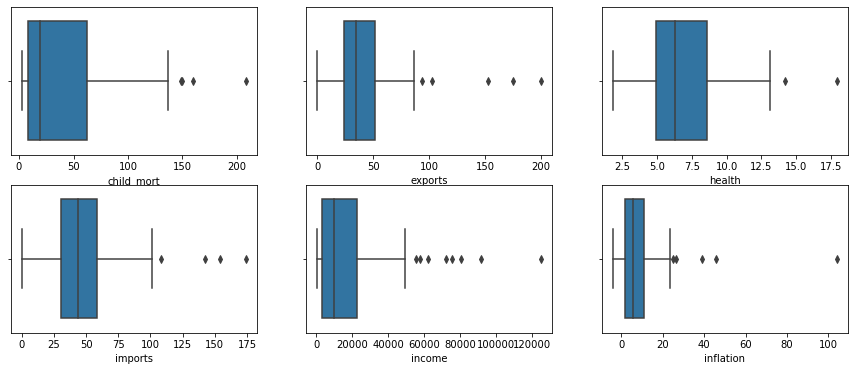

In [14]:
# Making boxplots as sub-plots to understand the trend of the data 
plt.figure(figsize=(15, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'child_mort', data = df_num)
plt.subplot(2,3,2)
sns.boxplot(x = 'exports', data = df_num)
plt.subplot(2,3,3)
sns.boxplot(x = 'health', data = df_num)
plt.subplot(2,3,4)
sns.boxplot(x = 'imports', data = df_num)
plt.subplot(2,3,5)
sns.boxplot(x = 'income', data = df_num)
plt.subplot(2,3,6)
sns.boxplot(x = 'inflation', data = df_num)
plt.show()

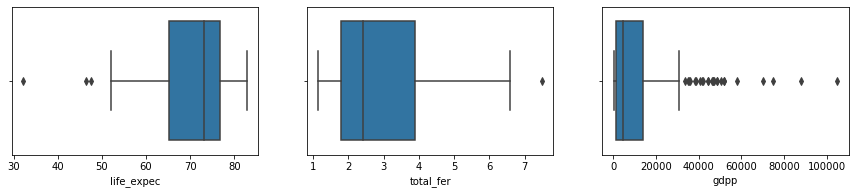

In [15]:
# Making boxplots as sub-plots to understand the trend of the data 
plt.figure(figsize=(15, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'life_expec', data = df_num)
plt.subplot(2,3,2)
sns.boxplot(x = 'total_fer', data = df_num)
plt.subplot(2,3,3)
sns.boxplot(x = 'gdpp', data = df_num)

Here, we recollect that PCA is sensitive to outliers and we have to act accordingly

### Note:
Regarding the **derived metrics**:

The columns exports and imports mentions that the columns should be expressed as a % of the GDP. The following notebook has been run with and without modifying the data and the end results obtained in the clustrs were the same as the values are scaled anyways.

Hence, I have not modified the "exports" and "imports" columns. 

### Removal of Outliers --section discarded as it was decided not to remove outliers on the basis of analysis

In [16]:
# # Remove the outliers

# def removeOutliers (dat, columnName):
#     q1 = dat[columnName].quantile(0.01)
#     q4 = dat[columnName].quantile(0.99)
#     dat = dat[(dat[columnName]>=q1) & (dat[columnName]<=q4)]
#     return dat

In [17]:
# # viewing the columns of the data
# df_num.columns

In [18]:
# # Removing the 99 percentile and and 1 percentile
# columnNames = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# for stringName in columnNames:
#     df_num = removeOutliers(df_num, stringName)


In [19]:
# # Making boxplots as sub-plots to understand the trend of the data 
# plt.figure(figsize=(15, 6))
# plt.subplot(2,3,1)
# sns.boxplot(x = 'child_mort', data = df_num)
# plt.subplot(2,3,2)
# sns.boxplot(x = 'exports', data = df_num)
# plt.subplot(2,3,3)
# sns.boxplot(x = 'health', data = df_num)
# plt.subplot(2,3,4)
# sns.boxplot(x = 'imports', data = df_num)
# plt.subplot(2,3,5)
# sns.boxplot(x = 'income', data = df_num)
# plt.subplot(2,3,6)
# sns.boxplot(x = 'inflation', data = df_num)
# plt.show()

In [20]:
# # Making boxplots as sub-plots to understand the trend of the data 
# plt.figure(figsize=(15, 6))
# plt.subplot(2,3,1)
# sns.boxplot(x = 'life_expec', data = df_num)
# plt.subplot(2,3,2)
# sns.boxplot(x = 'total_fer', data = df_num)
# plt.subplot(2,3,3)
# sns.boxplot(x = 'gdpp', data = df_num)

In [21]:
# df_num.shape

### Standardizing the Data

We do not have categorical or binary values to consider here, so we can standardize all of the values in df_num

In [22]:
# Normalizing the data
normalized_df=(df_num-df_num.mean())/df_num.std()
normalized_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.287660 -1.134867  0.278251 -0.082208 -0.805822   0.156864   -1.614237   
1   -0.537333 -0.478220 -0.096725  0.070624 -0.374243  -0.311411    0.645924   
2   -0.272015 -0.098824 -0.963176 -0.639838 -0.220182   0.786908    0.668413   
3    2.001787  0.773056 -1.443729 -0.164820 -0.583289   1.382894   -1.175698   
4   -0.693548  0.160186 -0.286034  0.496076  0.101427  -0.599944    0.702147   

   total_fer      gdpp  
0   1.897176 -0.677143  
1  -0.857394 -0.484167  
2  -0.038289 -0.463980  
3   2.121770 -0.514720  
4  -0.540321 -0.041692

In [23]:
# Normalizing the data
normalized_df=(df_num-df_num.mean())/df_num.std()
df_country = df['country']
df = pd.concat([df_country,normalized_df],axis=1)
normalized_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.287660 -1.134867  0.278251 -0.082208 -0.805822   0.156864   -1.614237   
1   -0.537333 -0.478220 -0.096725  0.070624 -0.374243  -0.311411    0.645924   
2   -0.272015 -0.098824 -0.963176 -0.639838 -0.220182   0.786908    0.668413   
3    2.001787  0.773056 -1.443729 -0.164820 -0.583289   1.382894   -1.175698   
4   -0.693548  0.160186 -0.286034  0.496076  0.101427  -0.599944    0.702147   

   total_fer      gdpp  
0   1.897176 -0.677143  
1  -0.857394 -0.484167  
2  -0.038289 -0.463980  
3   2.121770 -0.514720  
4  -0.540321 -0.041692

In [24]:
# Viewing the data
df_country.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

### PCA

In [25]:
# Importing required packages
from sklearn.decomposition import PCA

In [26]:
# Instantiating an instance of PCA
pca = PCA(random_state=100)

In [27]:
# Fitting the PCA instance on the normalized data
pca.fit(normalized_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
# Viewing the PCA components (There will be 9 components as there are 9 numerical columns)
pca.components_.round(2)

array([[-0.42,  0.28,  0.15,  0.16,  0.4 , -0.19,  0.43, -0.4 ,  0.39],
       [ 0.19,  0.61, -0.24,  0.67,  0.02, -0.01, -0.22,  0.16, -0.05],
       [-0.03,  0.14, -0.6 , -0.3 ,  0.3 ,  0.64,  0.11,  0.02,  0.12],
       [ 0.37,  0.  ,  0.46, -0.07,  0.39,  0.15, -0.2 ,  0.38,  0.53],
       [-0.17,  0.06,  0.52,  0.26, -0.25,  0.71,  0.11, -0.14, -0.18],
       [ 0.2 , -0.06,  0.01, -0.03,  0.16,  0.07, -0.6 , -0.75,  0.02],
       [-0.08, -0.71, -0.25,  0.59,  0.1 ,  0.1 ,  0.02,  0.03,  0.24],
       [-0.68, -0.01,  0.07, -0.03,  0.35, -0.01, -0.5 ,  0.29, -0.25],
       [ 0.33, -0.12,  0.11,  0.1 ,  0.61, -0.03,  0.29, -0.03, -0.63]])

Let us now look at the explained variance ratio for the components

In [29]:
# Plotting explained variance ratio
pca.explained_variance_ratio_.round(2)

array([0.46, 0.17, 0.13, 0.11, 0.07, 0.02, 0.01, 0.01, 0.01])

Great, we notice that about 80% of the variance is explained with the first 5 variables. 

We would like to explain about 80-90% of the variance.

#### Scree Plot

In [30]:
# Let us take the cumulative variance of the explained variance ratios
var_cumu = np.cumsum(pca.explained_variance_ratio_)

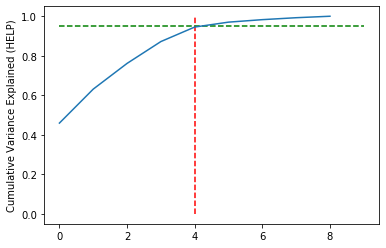

In [31]:
# Plotting the scree plot with a mark on 95 percentile of variance being captured
fig = plt.figure(figsize=[6,4])
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=9, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative Variance Explained (HELP)")
plt.show()

We now decide to do PCA with 5 (0 to 4) components as it explains a majority of the variance

To make the process more efficient, we shall not perform Incremental PCA using n_components = 5

#### Incremental PCA with 5 components

In [32]:
# importing Incremental PCA
from sklearn.decomposition import IncrementalPCA

In [33]:
# Using 4 components to perform incremental PCA
pca_final = IncrementalPCA(n_components = 5)

In [34]:
# Fitting and transforming the components on the normalized dataset  
df_pca = pca_final.fit_transform(normalized_df)

In [35]:
# Verifying that we have n_components = 4 (columns)
df_pca.shape

(167, 5)

The above functions should have essentially created 5 uncorrelated features that mostly explains the variance of the data.

We can verify that the chosen features are uncorrelated with the help of a heatmap

In [36]:
# Plotting the correlation matrix
corrmat = np.corrcoef(df_pca.transpose())
corrmat.shape

(5, 5)

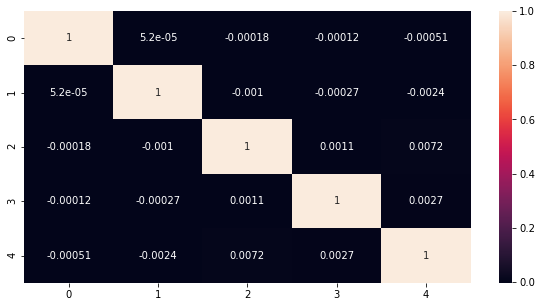

In [37]:
# Plotting the heatmap
plt.figure(figsize=[10,5])
sns.heatmap(corrmat, annot=True)

Great, the chose PCA components are not correlated.

Now, let us make a dataframe from the 5 chosen components.

In [38]:
# making a dataframe from the numpy array and naming the columns
df = pd.DataFrame(df_pca, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"])
df.head()

PCA1      PCA2      PCA3      PCA4      PCA5
0 -2.904265  0.091694 -0.719080  0.998834 -0.146325
1  0.428581 -0.587606 -0.327626 -1.161521  0.152746
2 -0.284433 -0.450783  1.228356 -0.855195  0.190654
3 -2.923920  1.693677  1.520503  0.853030 -0.214134
4  1.030273  0.133451 -0.216049 -0.844099 -0.192607

#### Hopkins Statistic 

The Hopkins Statistic is used to assess the cluster tendency of the data. Here, we are assessing the cluster tendency of the df_final PCA that we have.

**Q. How to assess the output?**
- The closer it is to 1, the higher the chances of clustering are.

We can conduct the Hopkins Statistic test iteratively, using 0.5 as the threshold to reject the alternative hypothesis. That is, if H < 0.5, then it is unlikely that D has statistically significant clusters.

Put in other words, If the value of Hopkins statistic is close to 1, then we can reject the null hypothesis and conclude that the dataset D is significantly a clusterable data.

In [39]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [40]:
# Viewing the Hopkins Statistic  
hopkins(df).round(2)

0.83

We have a Hopkins Statistics score of 0.83, which implies that the chosen PCA components have a decent cluster tendency.

In [41]:
# making a copy of the original datset
df_final = df.copy(deep = True)

### Silhouette Score Plot

In [42]:
# Importing required packages
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

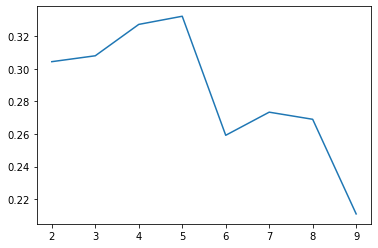

In [43]:
# Plotting Silhouette Score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df_final)
    ss.append([k, silhouette_score(df_final, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

From this, we learn that a number between 4 and 5 seems alright

### Elbow Curve

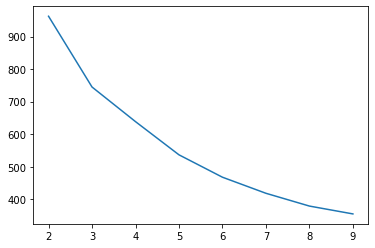

In [44]:
# Now, let's proceed to the elbow curve method

# plotting elbow curve
ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df_final)
    ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

We notice that we have an elbow at 4 and 6, we shall choose the number of clusters as 5.

### KMeans with the K that we have chosen
k = 5

In [45]:
#Let's perform K means using K=5
model_kmean = KMeans(n_clusters = 5, random_state = 100)
model_kmean.fit(df_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [46]:
# Viewing the column names present
df_final.columns

Index(['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'], dtype='object')

In [47]:
# Concatenating the country to the 5 chosen PCA components
df_km = pd.concat([df.reset_index().drop('index', axis = 1), pd.Series(model_kmean.labels_).reset_index().drop('index', axis  =1)], axis=1)
df_km.columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', "ClusterID"]

In [48]:
# Viewing the head of the kmeans data set we have made with the PCA components
df_km.head()

PCA1      PCA2      PCA3      PCA4      PCA5  ClusterID
0 -2.904265  0.091694 -0.719080  0.998834 -0.146325          3
1  0.428581 -0.587606 -0.327626 -1.161521  0.152746          0
2 -0.284433 -0.450783  1.228356 -0.855195  0.190654          0
3 -2.923920  1.693677  1.520503  0.853030 -0.214134          1
4  1.030273  0.133451 -0.216049 -0.844099 -0.192607          0

In [49]:
#Count of the number of countries in each country
df_km['ClusterID'].value_counts()

0    86
3    36
2    30
1    12
4     3
Name: ClusterID, dtype: int64

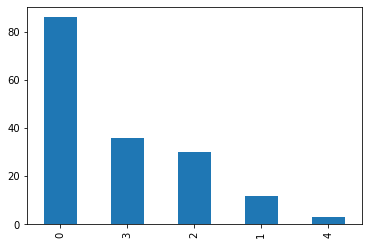

In [50]:
# Check the count of observation per cluster
df_km['ClusterID'].value_counts().plot(kind = 'bar')

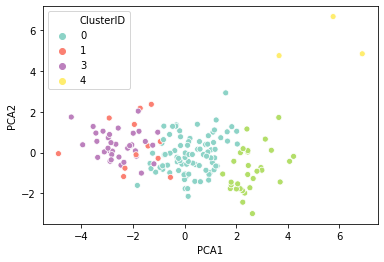

In [51]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'ClusterID', data = df_km, palette='Set3')

### Cluster profiling

Now that we have clustered the dataset on the basis of the principla components, let us now observe the features of the dataset across the clusters and how their behavior changes accordingly.

**Note:** 
The problem statement states that the focus should focus on the following variables:
- **gdpp**: The GDP per capita. Calculated as the Total GDP divided by the total population.
- **child_mort**: Death of children under 5 years of age per 1000 live births
- **income**: Net income per person

We shall proceed and plot **all** the features for analysis, but shall focus on the above three mentioned features for our suggestions to HELP (international humanitarian NGO)

In [52]:
# Viewing the dataset
df_temp = pd.concat([df_km,df_country], axis = 1)
df_temp.head()

PCA1      PCA2      PCA3      PCA4      PCA5  ClusterID  \
0 -2.904265  0.091694 -0.719080  0.998834 -0.146325          3   
1  0.428581 -0.587606 -0.327626 -1.161521  0.152746          0   
2 -0.284433 -0.450783  1.228356 -0.855195  0.190654          0   
3 -2.923920  1.693677  1.520503  0.853030 -0.214134          1   
4  1.030273  0.133451 -0.216049 -0.844099 -0.192607          0   

               country  
0          Afghanistan  
1              Albania  
2              Algeria  
3               Angola  
4  Antigua and Barbuda

In [53]:
# Viewing the Cluster Profiling dataset
df_ClusterProfiling = pd.merge(countryData, df_temp[['ClusterID', 'country']], on = 'country')
df_ClusterProfiling.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  ClusterID  
0       9.44        56.2       5.82    553          3  
1       4.49        76.3       1.65   4090          0  
2      16.10        76.5       2.89   4460          0  
3      22.40        60.1       6.16   3530          1  
4       1.44        76.8       2.13  12200          0

So, we have now performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints

In [54]:
# Clustering the numerical columns by Cluster ID
df_ClusterProfiling.drop('country', axis=1).groupby('ClusterID').mean()

child_mort     exports    health     imports        income  \
ClusterID                                                               
0           21.746512   41.403360  6.284535   48.329836  12992.558140   
1           71.725000   44.450000  5.179167   36.816667   9605.833333   
2            4.953333   45.826667  9.168667   39.736667  45250.000000   
3           97.200000   24.119722  6.671111   43.622222   2248.138889   
4            4.133333  176.000000  6.793333  156.666667  64033.333333   

           inflation  life_expec  total_fer          gdpp  
ClusterID                                                  
0           6.613849   72.801163   2.287209   6885.604651  
1          31.575000   65.558333   4.722500   5224.166667  
2           2.742200   80.376667   1.795333  43333.333333  
3           7.283472   57.766667   5.026111   1040.611111  
4           2.468000   81.433333   1.380000  57566.666667

### Bar Plots

##### Here, we shall plot the bar plots for gdpp, income and child mortality rate.

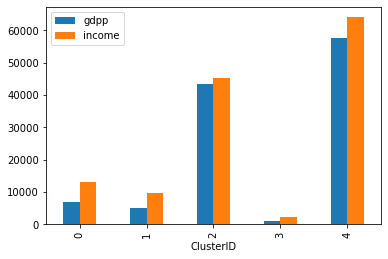

In [55]:
# Plotting bar plots of the required features (this is being done such that the scale is similar)
df_ClusterProfiling[['country', 'ClusterID', 'gdpp', 'income']].\
drop('country', axis=1).groupby('ClusterID').mean().plot(kind = 'bar')

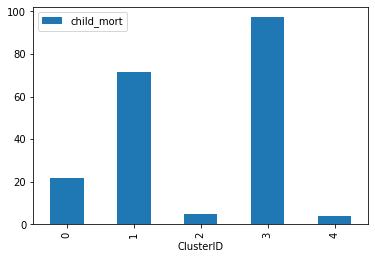

In [56]:
# Plotting bar plots of the required features (this is being done such that the scale is similar)
df_ClusterProfiling[['country', 'child_mort', 'ClusterID']].\
drop('country', axis=1).groupby('ClusterID').mean().plot(kind = 'bar')

### Scatter plots

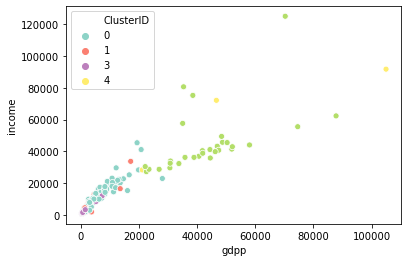

In [57]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'ClusterID', data = df_ClusterProfiling, palette='Set3')

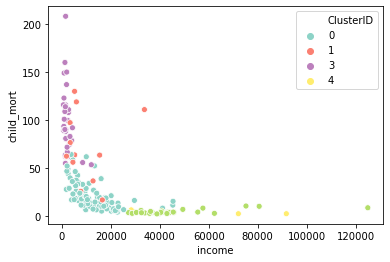

In [58]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'ClusterID', data = df_ClusterProfiling, palette='Set3')

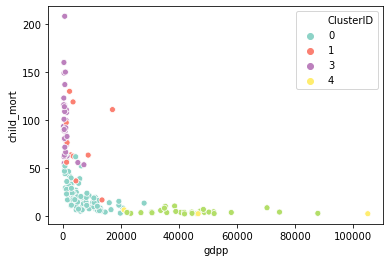

In [59]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'ClusterID', data = df_ClusterProfiling, palette='Set3')

In [60]:
df_ClusterProfiling.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID'],
      dtype='object')

### Box Plots

##### Analyzing the distribution of the features with respect to the clusters

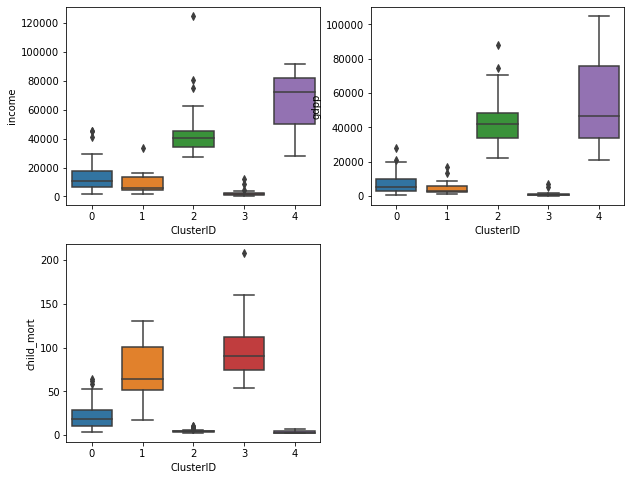

In [61]:
# Plotting the box plots to observe distribution
plt.figure(figsize = (10,8))
var = ['income', 'gdpp', 'child_mort']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'ClusterID', y = i[1], data = df_ClusterProfiling)

We have now analyzed the bar plots and the bar plots for gdpp, income and mortality rate.

Find below the observations cluster-wise:
1. Cluster 0: The child mortality rate is low, the income and gdpp are barely above Cluster 1
2. Cluster 1: The child mortality rate is alarmingly high, The gdp and income are the second-lowest
3. Cluster 2: The child mortality rate is quite low, the income and gdp are the second highest
4. Cluster 3: The child mortality rate is the highest (very bad), the income and gdp are the lowest of all the clusters.
5. Cluster 4: The child mortality rate is the lowest, the income and the gdp are the highest of all the clusters

Now, when we are going to proceed to suggest to the NGO, we need to focus on the countries that have the highest child mortality rate, lowest income and lowest GDP on average. Based on this, the focus should be as mentioned below:


- **Cluster-3 > Cluster-1 > Cluster-0 > Cluster-2 > Cluster-4**


In [62]:
df_ClusterProfiling.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID'],
      dtype='object')

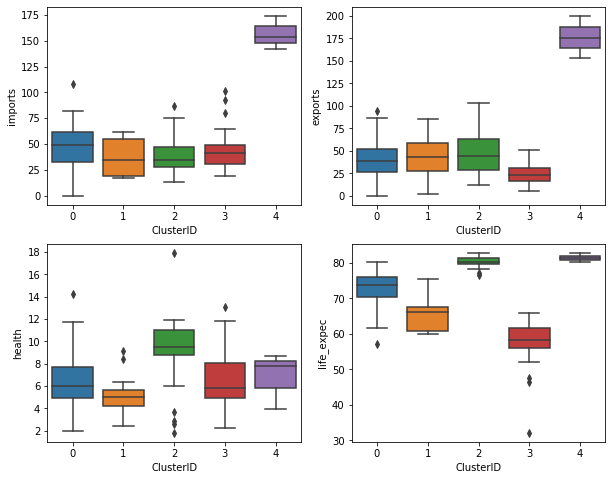

In [63]:
# Plotting the box plots to observe distribution
plt.figure(figsize = (10,8))
var = [ 'imports', 'exports', 'health', 'life_expec']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'ClusterID', y = i[1], data = df_ClusterProfiling)

Analyzing the above features, we can be even more sure that Cluster-3 is in dire need of attention.

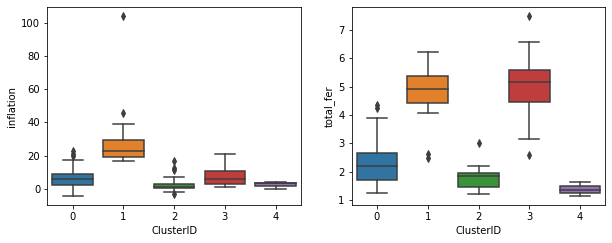

In [64]:
# Plotting the box plots to observe distribution
plt.figure(figsize = (10,8))
var = [ 'inflation', 'total_fer']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'ClusterID', y = i[1], data = df_ClusterProfiling)

From this, we can make the following observations about Cluster-3:
    - Cluster 3 has the lowest income
    - It also has the lowest GDP of all the clusters
    - The highest mortality rate is present in cluster 3
    - It has a low amount of exports as compared to the other clusters
    - By far, it has the lowest life expectancies, around 60, with multiple countries having even lower expectancies


In [65]:
#Let's use the concept of binning
# Find the countries

df_ClusterProfiling[df_ClusterProfiling['ClusterID'] ==0]['country'].head()

1                Albania
2                Algeria
4    Antigua and Barbuda
5              Argentina
6                Armenia
Name: country, dtype: object

In [66]:
#Let's use the concept of binning
# Find the countries

df_ClusterProfiling[df_ClusterProfiling['ClusterID'] ==1]['country'].head()

3                Angola
38          Congo, Rep.
49    Equatorial Guinea
55                Gabon
72                 Iraq
Name: country, dtype: object

In [67]:
#Let's use the concept of binning
# Find the countries

df_ClusterProfiling[df_ClusterProfiling['ClusterID'] ==2]['country'].head()

7     Australia
8       Austria
15      Belgium
23       Brunei
29       Canada
Name: country, dtype: object

In [68]:
#Let's use the concept of binning
# Find the countries

df_ClusterProfiling[df_ClusterProfiling['ClusterID'] ==3]['country']

0                   Afghanistan
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
40                Cote d'Ivoire
50                      Eritrea
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
106                  Mozambique
108                     Namibia
112                       Niger
116                    Pakistan
126                      Rwanda
129                     Senegal
132                Sierra Leone
137     

In [69]:
#Let's use the concept of binning
# Find the countries

df_ClusterProfiling[df_ClusterProfiling['ClusterID'] ==4]['country']

91     Luxembourg
98          Malta
133     Singapore
Name: country, dtype: object

#### Hierarchial Clustering

In [70]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

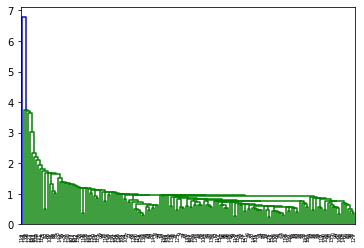

In [71]:
# single linkage
mergings = linkage(df_final, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

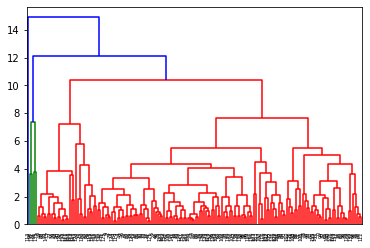

In [72]:
# complete linkage
mergings = linkage(df_final, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

From the above hierarchial linking, we identify that 4 clusters are needed, when we cut around 7.6, which is the same result as K-Means. It can also be interpreted as 6 clusters are required. 

We shall stick to the clustering that we have done with k = 5 as we have substantial proof from the Cluster Profiling that we have done with the features.

List of countries that need focus: (Cluster - 3)

Afghanistan, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Cote d'Ivoire, Eritrea, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mozambique, Namibia, Niger, Pakistan, Rwanda, Senegal, Sierra Leone, South Africa, Tanzania, Togo, Uganda, Zambia


A lot of the countries that we have picked up belong to South Africa. Hence, we should focus there first.


The top 5 countries that we can focus on to begin with can include the following:
- Uganda
- Zambia
- Mozambique
- Congo
- Afghanistan

THE END

I hope you enjoyed assessing the assignment. Thank you. 